In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Clustering

In [3]:
pd.read_csv("data/pulsar_stars.csv")

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


Incremental learning - обучаваме алгоритъм на части.

In [4]:
for chunk in pd.read_csv("data/pulsar_stars.csv", chunksize = 1000):
    print(chunk)
    break

     Mean_of_the_integrated_profile  \
0                        140.562500   
1                        102.507812   
2                        103.015625   
3                        136.750000   
4                         88.726562   
..                              ...   
995                      110.554688   
996                      111.289062   
997                      108.835938   
998                      128.554688   
999                      103.882812   

     Standard_deviation_of_the_integrated_profile  \
0                                       55.683782   
1                                       58.882430   
2                                       39.341649   
3                                       57.178449   
4                                       40.672225   
..                                            ...   
995                                     47.456528   
996                                     57.133499   
997                                     45.501507   
9

In [5]:
for chunk in pd.read_csv("data/pulsar_stars.csv", chunksize = 1000):
    print(chunk["Mean_of_the_integrated_profile"].min(), chunk["Mean_of_the_integrated_profile"].max())

8.2265625 171.8359375
7.828125 168.0625
6.4140625 177.5
6.9375 166.3671875
6.1796875 190.421875
5.8125 174.4453125
16.125 189.734375
10.296875 177.7421875
6.265625 184.4609375
6.1875 172.5625
7.0390625 186.0234375
6.984375 180.859375
15.6875 185.2578125
8.9609375 183.4140625
8.2421875 183.453125
45.84375 192.6171875
31.3046875 184.296875
10.8359375 161.78125


Gradient descent не е алгоритъм за обучаване, той е алгоритъм за подобрение.

In [6]:
chunk.columns

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_deviation_of_the_DM_SNR_curve',
       ' Excess_kurtosis_of_the_DM_SNR_curve', ' Skewness_of_the_DM_SNR_curve',
       'target_class'],
      dtype='object')

In [7]:
svm = LinearSVC()

In [8]:
sgd = SGDClassifier()

stochastic gradient descent (SGD) 
 
stochastic - означава случаен. В процеса участва случайна променлива.

In [9]:
for chunk in pd.read_csv("data/pulsar_stars.csv", chunksize = 1000):
    X, y = chunk.drop(columns = ["target_class"]), chunk["target_class"]
    print(X.shape)
    
    # svm.partial_fit()
    sgd.partial_fit(X, y, classes = y.unique())

(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(898, 8)


In [10]:
# MultinomialNB().partial_fit(X, y)

In [11]:
sgd.coef_

array([[-258.66374292,  185.70160252,  179.26940266,  626.29400352,
         -47.37351914,  187.76518965,  198.04105962,  -95.93177805]])

In [12]:
sgd = SGDClassifier(max_iter = 2)

## Gradient Descent
е един от най-популярните алгоритми за оптимизация, използван широко в машинното обучение и статистическото моделиране. Той служи за намиране на минималната (или максималната) стойност на дадена функция, като непрекъснато променя параметрите на модела така, че да минимизира функцията на загубите (loss function), която измерва разликата между предсказаните стойности и действителните стойности.

In [13]:
attributes, clusters = make_blobs(n_samples = 200)

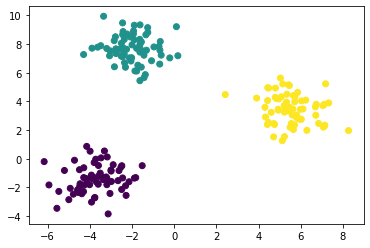

In [14]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

In [15]:
attributes, clusters = make_blobs(n_samples = 5000)

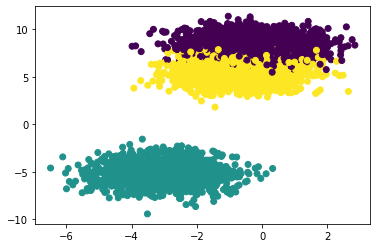

In [16]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

In [17]:
attributes_train, attributes_test, clusters_train, clusters_test = train_test_split(attributes, clusters, test_size = 0.1, stratify = clusters)

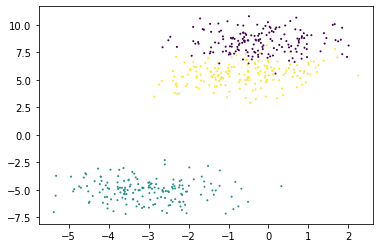

In [18]:
plt.scatter(attributes_test[:, 0], attributes_test[:, 1], c = clusters_test, s = 1)
plt.show()

In [19]:
k_means = KMeans(n_clusters = 3, init = "random")

In [20]:
k_means.fit(attributes_train)

KMeans(init='random', n_clusters=3)

In [21]:
train_predictions = k_means.predict(attributes_train)

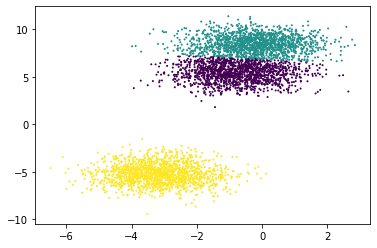

In [22]:
plt.scatter(attributes_train[:, 0], attributes_train[:, 1], c = train_predictions, s = 1)

In [23]:
train_predictions = k_means.predict(attributes_test)

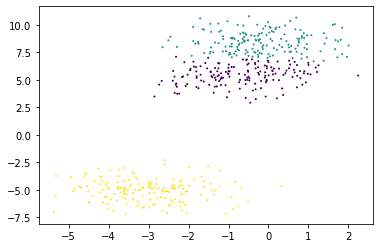

In [24]:
plt.scatter(attributes_test[:, 0], attributes_test[:, 1], c = train_predictions, s = 1)

In [25]:
attributes, clusters = make_blobs(n_samples = 500, cluster_std = 3)

Искаме да го накараме да сбърка.

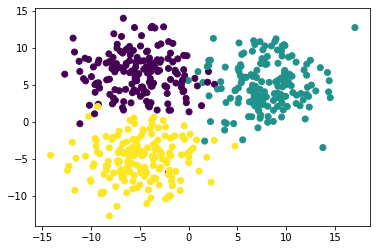

In [26]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)

Тук клъстерите си приличат и това е очаквано.

In [27]:
k_means.fit(attributes)

KMeans(init='random', n_clusters=3)

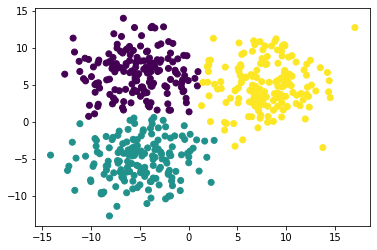

In [28]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = k_means.predict(attributes))

А това е резултата от predict.k_means = KMeans(n_clusters = 3, init = "random")

In [29]:
k_means = KMeans(n_clusters = 5, init = "random")

In [30]:
attributes_train, attributes_test, clusters_train, clusters_test = train_test_split(attributes, clusters, test_size = 0.1, stratify = clusters)

In [31]:
k_means.fit(attributes)

KMeans(init='random', n_clusters=5)

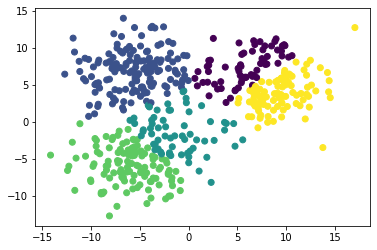

In [32]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = k_means.predict(attributes))

In [33]:
attributes, clusters = make_blobs(n_samples = 500)

In [34]:
k_means = KMeans(n_clusters = 5, init = "random")
k_means.fit(attributes)

KMeans(init='random', n_clusters=5)

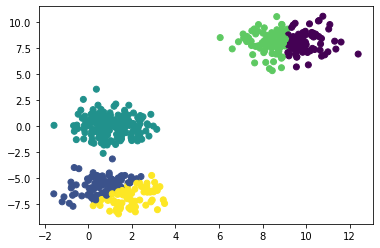

In [35]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = k_means.predict(attributes))

В K-Means не е възможно клъстерите да се препокриват.

In [56]:
attributes_skewed = attributes @ np.array([
    [1, 2],
    [3, 1]
])

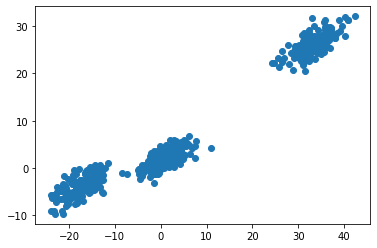

In [63]:
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1])

In [61]:
k_means.fit(attributes_skewed)

KMeans(init='random', n_clusters=5)

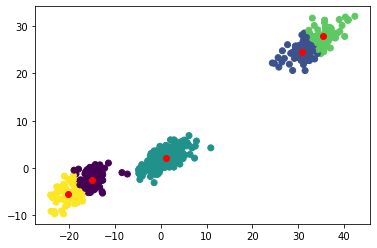

In [62]:
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1], c = k_means.predict(attributes_skewed))
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = "r")

In [58]:
k_means.cluster_centers_

array([[ -0.6924562 ,  -0.51818454],
       [  2.22291888,   1.2256489 ],
       [ 21.97779891,  12.59789237],
       [ -7.43627267,  -4.83604613],
       [-10.41091359,  -6.59962312]])